<h1><center><font size=10>Good Cardio Fitness Project</center></font></h1>

### **Context:**
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. A treadmill is a device generally used for walking, running, or climbing while staying in the same place. It can be purchased and placed at home or can be accessed in most GYMs. Today most advanced Treadmills offer very advanced subscription models to their users in order to make their products more interactive and modern. However more technology built around the devices means higher prices. Before producrs are being launched into the market few factors are taken into account which may affect the pricing and popularity of these devies.

### **Objective:**
- Come up with a customer profile (characteristics of a customer) of the different products
- Perform univariate and multivariate analyses
- Generate a set of insights and recommendations that will help the company in targeting new customers.

### **Key Questions:**
1. Which product is most used accross all ages and income levels?
2. Which product is high end and which product is more affordable based on income and usage data provided? 
3. What are your recommendations to Good Cardio to capitalize on different customer profiles?

### **Data Description:**
The data contains the details for the Good Cardio customers
* Product - The model no. of the treadmill
* Age -  Age of the customer in no of years
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run

********
## **Data Overview & Sanity Check**
********

#### **Importing the necessary packages**

In [1]:
# To Suppress warning such as future warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# For reading and manipulating data
import pandas as pd
import numpy as np 
# Libraries used data visualization
import seaborn as sns 
import matplotlib.pyplot as plt

# Command to tell Python to actually display the graphs
%matplotlib inline

pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values upto 2 decimal places



#### **Reading the DataSet**

In [3]:
# Importing the Dataset
data=pd.read_csv("https://raw.githubusercontent.com/miricoder/projects/main/datasets/CardioGoodFitness.csv")

In [4]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

#### **Displaying the first few rows of the dataset**

In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


* The Dataset has been properly loaded
* Product Column displays the categories of different Treadmill brands
* Gender Column is categorized into Males and Females
* MaritalStatus Column is categorized into Single and Partnered individuals 
* There're no float values in the DatasSet

#### **Checking the shape of the dataset - Rows/Columns**

In [6]:
df.shape

(180, 9)

* There're 180 Rows and 9 columns in our DataSet

#### **Checking the data types of the columns for the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* There're 3 Objects Data Types
* There're 6 Numerical Data Types

#### **Checking statistical summary of the Data**

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.00,NaN,NaN,NaN,28.79,6.94,18.00,24.00,26.00,33.00,50.00
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.00,NaN,NaN,NaN,15.57,1.62,12.00,14.00,16.00,16.00,21.00
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.00,NaN,NaN,NaN,3.46,1.08,2.00,3.00,3.00,4.00,7.00
Fitness,180.00,NaN,NaN,NaN,3.31,0.96,1.00,3.00,3.00,4.00,5.00
Income,180.00,NaN,NaN,NaN,53719.58,16506.68,29562.00,44058.75,50596.50,58668.00,104581.00
Miles,180.00,NaN,NaN,NaN,103.19,51.86,21.00,66.00,94.00,114.75,360.00


* There're 3 unique product categories with TM195 being most frequently used product
* There're 2 unique genders in the Data Set and 2 unique MaritalStatus's 
* Mean(Average) age of users is close to 29 while age range is between 18 and 50 years old 
* Less than 75% of user are 33 years old where as less than 50% of users are in their mid 20's
* The Age standard deviation is high
* Mean Education is 15.57 which is approx. 16 years of age, where education years range between 12 and 21.
* Income mean is 53719.58 and it ranges between 29.5K and 104.5K with high standard deviation of 16.5K
 - Median income of users is 50596.50 where less than 75% makes more than 58K and less than 25% makes 44K
* Mean miles exepected to run by customer is 103, where the range is between 21 and 360miles per week, with big standard deviation 
 - Less than 75% of users expect to run 144miles where median expectation is at 94Miles.

`Reconfirming the unique product category and most used Product?`

In [9]:
print("*****************************") 
unique_products=df['Product'].unique()
mostUsed_product=df['Product'].mode()
print("Unique Product Category: " ,unique_products, "\nMost Popular Product Category: " ,mostUsed_product);
print("*****************************") 

*****************************
Unique Product Category:  ['TM195' 'TM498' 'TM798'] 
Most Popular Product Category:  0    TM195
dtype: object
*****************************


#### **Missing Value Treatment (Sanity Check) - if any found then decision will be made on the method imputation such as Mean, Median or Mode - which ever firts the best**

In [10]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* The dataset contains no missing values

**********
## **Exploritary Data Analysis :  Univariate & Multivariate Analysis**
**********

Rusable Method for Histplot and boxplot

In [11]:
def hist_box(data, feature, figsize=(10,5), kde=True, bins=None):
    """
    Boxplot and Histogram combined within the same graph page 
    in order to make comparison and analysis more efficient 
    
    data: dataframe
    feature: dataframe column 
    figsize: size of the figures (default (10,5))
    kde: whether to show the density curve (values set by user during usage - Boolean)
    bins: number of bins for histogram (default None)
"""
    #f2 holds are graph withax_box2 and ax_hist2 params
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, #Number of rows of subplot grid=2
        sharex=True, #x-axis will be shared among all subplots 
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)
    
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet") 
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

Rusable Method for Calculating A five-number summary values - printing most important ones

In [38]:
def five_number_summary(column_name):
    """
    column_name: name of the column that should be searched and stats described for
    """
    _25p=df[column_name].quantile(.25) 
    _median=df[column_name].median()
    _mean=df[column_name].mean()
    _75p=df[column_name].quantile(.75)
    std=df[column_name].std()
    print("25%",_25p,"\n" "Mean-Green", _mean,"\n" "Median-Boxplot"
          , _median,"\n" "75%",_75p,"\n","StandarD",std,"\n")
   

##### **Observation Age(Numerical) Column**

********************
25% 24.0 
Mean-Green 28.788888888888888 
Median-Boxplot 26.0 
75% 33.0 
 StandarD 6.943498135399795 

********************


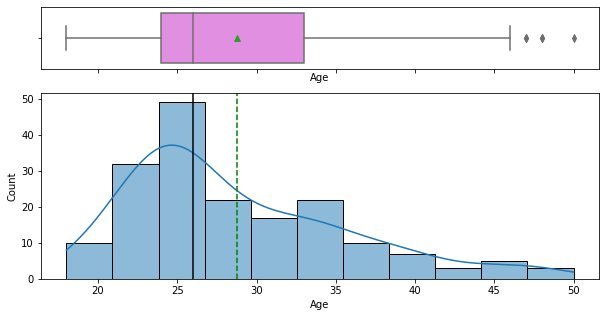

In [39]:
print("********************")
five_number_summary('Age') # Calling reusable five_number_summary()
print("********************")
hist_box(df,'Age') # Calling reusable hist_box()

* Distribution of Age is highly right skewed
* Mean is greater than Median closer to 75%
* Less than 50% of the Users are younger than 26 years old
* Less than 50% of the users are between ages 18 and 25

#### **Observations on Education(Numerical)  Column**

********************
25% 14.0 
Mean-Green 15.572222222222223 
Median-Boxplot 16.0 
75% 16.0 
 StandarD 1.6170548978065569 

********************


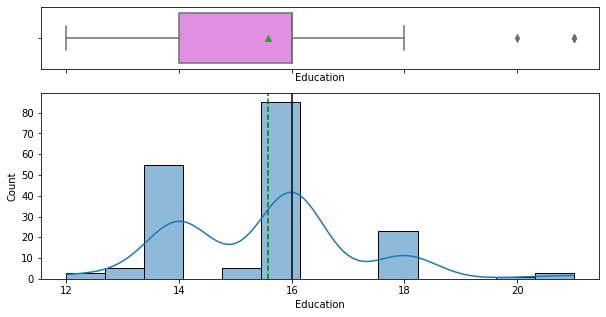

In [41]:
print("********************")
five_number_summary('Education') # Calling reusable five_number_summary()
print("********************")
hist_box(df,'Education') # Calling reusable hist_box()

* There're two main education Groups, 14 and 16 years
* Outliers are on the rigt side, meaning there're some folks have higher than 16 years of education. 
 - We can also see that in the hist graph where it gets skewed a little as it goes beyond 18 years of education

`What is Percentage of each eduation years in our data?`

In [42]:
print("*******************")
equalto_16_p  = df[df['Education'] == 16].value_counts().sum()/df.shape[0]*100 #Finding %
print("Users with 16Years of Education:  ", round(equalto_16_p), '%')

equalto_16_p  = df[df['Education'] == 14].value_counts().sum()/df.shape[0]*100 #Finding %
print("Users with 14Years of Education:  ", round(equalto_16_p), '%')
print("********************")

*******************
Users with 16Years of Education:   47 %
Users with 14Years of Education:   31 %
********************


* There're more users with 16Years of Education than 14yrs of Education
* 79% of Education years falls between 14&16 

#### **Observations on Usage (Numerical)  Column**

********************
25% 3.0 
Mean-Green 3.4555555555555557 
Median-Boxplot 3.0 
75% 4.0 
 StandarD 1.0847970343962436 

********************


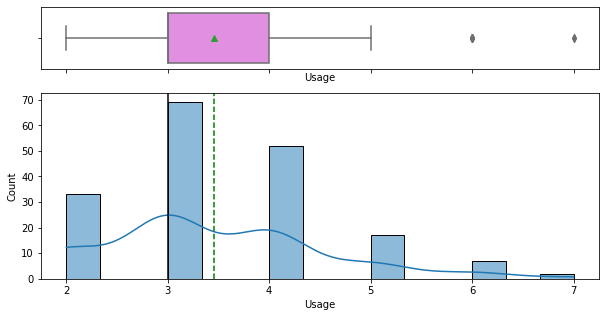

In [43]:
print("********************")
five_number_summary('Usage') # Calling reusable five_number_summary()
print("********************")
hist_box(df,'Usage') # Calling reusable hist_box()

* Equipment is more frequently used 3 or 4 times per week
* Outliers are on the rigt side, meaning there're some folks who are using the equipment more than 4 times per week. 
* Less than 75% of Usage per week is close to 4 times per week

`What is percentage/count for usage frequency of 3&4?`

In [46]:
print("*******************")
equalto_3_c  = df[df['Usage'] == 3].value_counts().sum() # Count
equalto_3_p  = df[df['Usage'] == 3].value_counts().sum()/df.shape[0]*100 # %Percentage
print("3 Times per week in Count:  ", equalto_3_c)
print("3 Times per week in %    :  ", round(equalto_3_p), '%')
print("-- -- -- -- -- -- -- -- -- -- --")
equalto_4_c  = df[df['Usage'] == 4].value_counts().sum() # Count
equalto_4_p  = df[df['Usage'] == 4].value_counts().sum()/df.shape[0]*100 # %Percentage
print("4 Times per week in Count:  ", equalto_4_c)
print("4 Times per week in %    :  ", round(equalto_4_p), '%')
print("********************")

*******************
3 Times per week in Count:   69
3 Times per week in %    :   38 %
-- -- -- -- -- -- -- -- -- -- --
4 Times per week in Count:   52
4 Times per week in %    :   29 %
********************


* Usage frequency between 3-4 times per week is about 67% of the overall usage, which is still below 75%

#### **Observations on Fitness (Numerical)  Column**

********************
25% 3.0 
Mean-Green 3.311111111111111 
Median-Boxplot 3.0 
75% 4.0 
 StandarD 0.958868565619312 

********************


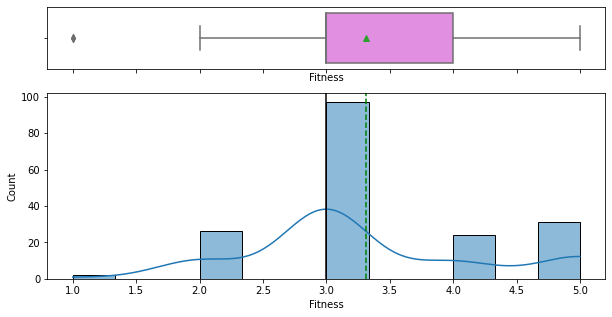

In [56]:
print("********************")
five_number_summary('Fitness') # Calling reusable five_number_summary()
print("********************")
hist_box(df,'Fitness') # Calling reusable hist_box()

* Less than 75% of Fitness level is at 3, but there're few below that as well causing left skewedness

`What is the highest and lowest Fitness level in the data?`

In [57]:
# 
print("*******************")
f_equalto_3_c  = df[df['Fitness'] == 3].value_counts().sum() # Count
f_equalto_3_p  = df[df['Fitness'] == 3].value_counts().sum()/df.shape[0]*100 # %Percentage
print("Count of Fitness level at 3:  ", f_equalto_3_c)
print("Percentage of Fitness level at 3:  ", round(f_equalto_3_p), '%')
print("-- -- -- -- -- -- -- -- -- -- --")
f_lessthan_2_c  = df[df['Fitness'] < 2].value_counts().sum() # Count
f_lessthan_2_p  = df[df['Fitness'] < 2].value_counts().sum()/df.shape[0]*100 # %Percentage
print("Count of fitness level less than 2:  ", f_lessthan_2_c)
print("Percentage of fitness level less than 2:  ", round(f_lessthan_2_p), '%')
print("*******************")

*******************
Count of Fitness level at 3:   97
Percentage of Fitness level at 3:   54 %
-- -- -- -- -- -- -- -- -- -- --
Count of fitness level less than 2:   2
Percentage of fitness level less than 2:   1 %
*******************


 - 54% of Users have self Rated fitness Level  of 3 
   - More than half of our users are using the App to rate their Fitness Level
 - 1% of Users have self Rated fitness Level  of 2

#### **Observations on Income (Numerical)  Column**

********************
25% 44058.75 
Mean-Green 53719.57777777778 
Median-Boxplot 50596.5 
75% 58668.0 
 StandarD 16506.68422623862 

Max Income:  104581
********************


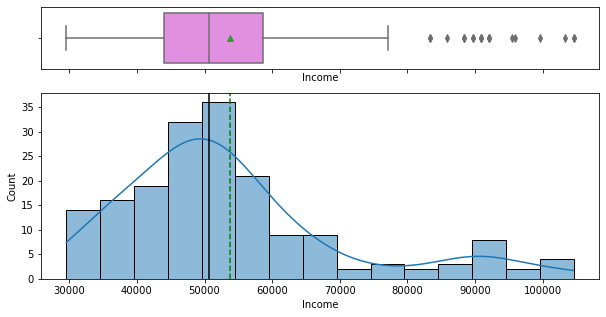

In [58]:
print("********************")
five_number_summary('Income') # Calling reusable five_number_summary()
hist_box(df,'Income') # Calling reusable hist_box())
print("Max Income: ", df['Income'].max()) # Get Max Income
print("********************")

* Mean and Median are close to the each other
* Most of the users earns between 50-55k
* Less than 25% of users makes 44K while Median income is at almost 51K
* However there are some individuals making over 70K and max of 104581K
   - There is high standart deviation 
* Distribution is highly right skewed as income increases & there're outliers

#### **Observations on Miles (Numerical)  Column**

********************
25% 66.0 
Mean-Green 103.19444444444444 
Median-Boxplot 94.0 
75% 114.75 
 StandarD 51.86360466180931 

Max Income:  360
********************


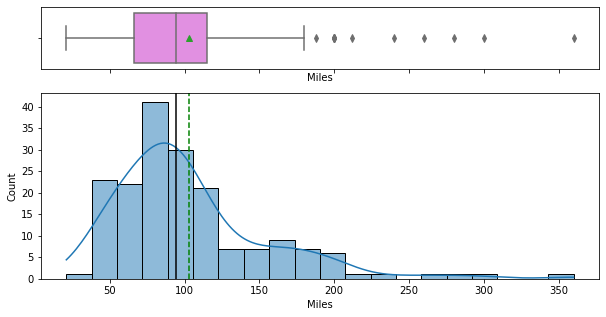

In [59]:
print("********************")
five_number_summary('Miles') # Calling reusable five_number_summary()
hist_box(df,'Miles') # Calling reusable hist_box())
print("Max Income: ", df['Miles'].max())# Get Max Miles
print("********************")

* Less than 25% users expects to run 66 miles
* Distribution is right skewed & Mean is close to the Median and 75%
* The Standard Deviation is high
* Median Miles to Run Expectation is at 94 miles

#### **Observations on Product (Categorical)  Column**

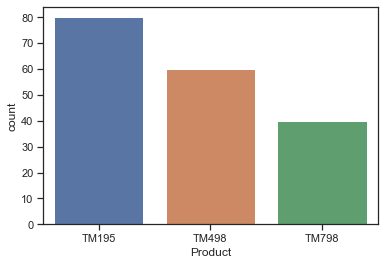

In [66]:
sns.countplot(data=df, x='Product');

* There're 3 unique Product Categories (TM195, TM498, TM798)
* TM195 is more popular than TM498&TM798 models

#### **Observations on Gender (Categorical)  Column**

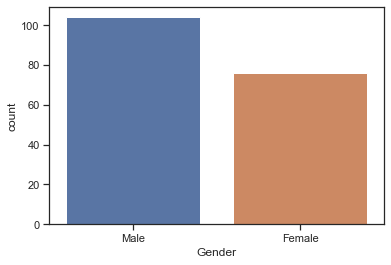

In [68]:
sns.countplot(data=df, x='Gender');

* There're 2 unique Gender Categories 

`What is the percentage and count of Males vs Female users?`

In [70]:
print("*******************")
gender_Gender_M_c  = df[df['Gender'] == 'Male'].value_counts().sum() # Count
gender_Gender_M_p  = df[df['Gender'] == 'Male'].value_counts().sum()/df.shape[0]*100 # %Percentage
print("Count of Male Users:  ", gender_Gender_M_c)
print("Percentage of Male Users:  ", round(gender_Gender_M_p), '%')
print("-- -- -- -- -- -- -- -- -- -- --")
gender_Gender_F_c  = df[df['Gender'] == 'Female'].value_counts().sum() # Count
gender_Gender_F_p  = df[df['Gender'] == 'Female'].value_counts().sum()/df.shape[0]*100 # %Percentage
print("Count of Female Users:  ", gender_Gender_F_c)
print("Percentage of Female Users:  ", round(gender_Gender_F_p), '%')
print("*******************")

*******************
Count of Male Users:   104
Percentage of Male Users:   58 %
-- -- -- -- -- -- -- -- -- -- --
Count of Female Users:   76
Percentage of Female Users:   42 %
*******************


* Most of the customers are Male at `58%`  compared to females at `42%`

#### **Observations on MaritalStatus (Categorical)  Column**

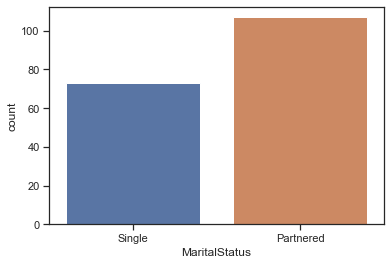

In [71]:
sns.countplot(data=df, x='MaritalStatus');

* There're 2 categories of MaritalStatus Single, Partnered

`What is the percentage&count of Single vs Partnered users in the data?`

In [73]:
print("*******************")
gender_Single_c  = df[df['MaritalStatus'] == 'Single'].value_counts().sum() # Count
gender_Single_p  = df[df['MaritalStatus'] == 'Single'].value_counts().sum()/df.shape[0]*100 # %Percentage
print("Count of Marital Status for Single:  ", gender_Single_c)
print("Percentage of Marital Status for Single:  ", round(gender_Single_p), '%')
print("-- -- -- -- -- -- -- -- -- -- --")
gender_Partnered_c  = df[df['MaritalStatus'] == 'Partnered'].value_counts().sum() # Count
gender_Partnered_p  = df[df['MaritalStatus'] == 'Partnered'].value_counts().sum()/df.shape[0]*100 # %Percentage
print("Count of Marital Status for Partnered:  ", gender_Partnered_c)
print("Percentage of Marital Status for Partnered:  ", round(gender_Partnered_p), '%')
print("*******************")

*******************
Count of Marital Status for Single:   73
Percentage of Marital Status for Single:   41 %
-- -- -- -- -- -- -- -- -- -- --
Count of Marital Status for Partnered:   107
Percentage of Marital Status for Partnered:   59 %
*******************


* `59%` of users are Partnered where as `41%` are Single. 

*****
### **Bivariate & Multivariate analysis Analysis**
` of 2 or more Columns together`
*****

#### **Analyzing the correlation among numerical variables**

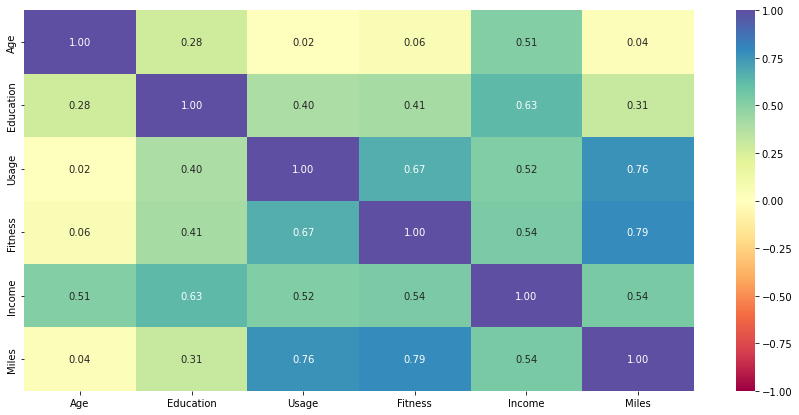

In [60]:
# Correlation of numerical values in shot
num_var = ['Age','Education','Usage','Fitness','Income', 'Miles']
corr = df[num_var].corr()
# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* More Income comes with more Education ~ `0.63`
* Income & Age are Strongly correlated  ~ `0.51`
* Higher income positively influences weekly usage rate ~ `0.52`
* Higher income positively influences Fitness Level rate ~ `0.54` (as expected)
* Higher income positively influences Miles expected to ~ `0.54` (as expected)
###### Higher Education means Higher income, Higher means more investment in individuals health, so seems in this data

`What is the Median age per Product Category?`

******************
Product
TM195   26.00
TM498   26.00
TM798   27.00
Name: Age, dtype: float64
******************


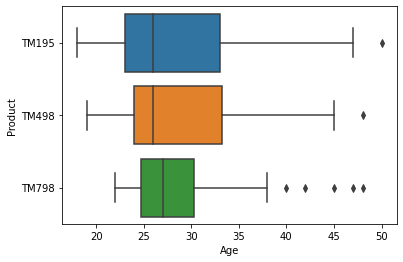

In [63]:
sns.boxplot(data=df, x='Age', y='Product'); # Boxplot age and product category using df Data
print("******************")
print(df.groupby(['Product'])['Age'].median()) #Print median age per Product Category
print("******************")

* Median age for TM798 is 27 and higher than TM498 and TM195 at 26
* TM195 and TM498 has the same Median age ~ 26
* TM798 has a lot of outliersm, and is right skewed

`Distributing Product type per all Ages to narrow down product choice amongst various Ages`

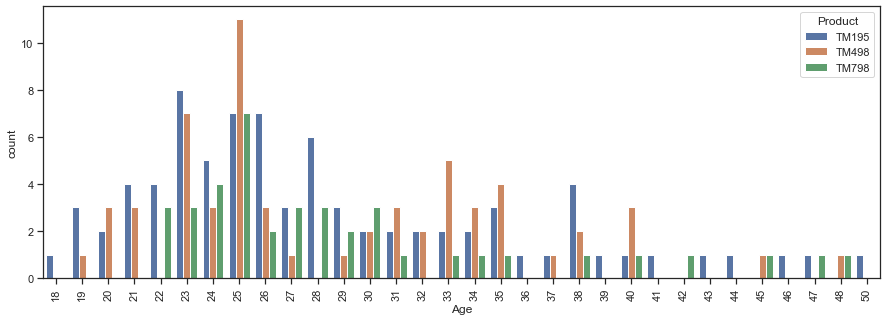

In [76]:
plt.figure(figsize=(15,5)) #Set the Figure Size for below countplot
sns.countplot(data=df, x='Age', hue='Product')
plt.xticks(rotation=90); #Rotate the Age values for better seeing


* TM195 is most popular amongst all ages except 25yrs olds who seems to prefer TM498 

##### **Understanding the median income per age when it comes to product usage**

In [92]:
df[df['Age'] == 25].groupby('Product').median()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,25.00,14.00,3.00,3.00,43206.00,75.00
TM498,25.00,14.00,3.00,3.00,45480.00,95.00
TM798,25.00,18.00,4.00,5.00,64741.00,170.00


* 25 Years olds with 45480K income annualy seems to use TM498 more, as evident from Miles Expected to run. 
* Users choices in Expectation on Miles to Income levels, indicates lower annual income choise is mostly TM498 followed by TM195, where as TM798 is mostly preferred by higher income individuals
 - TM798 is more expensive
 - The reason why TM195 is popular across all income levels could be that its cheaper and best fit for the first time try outs

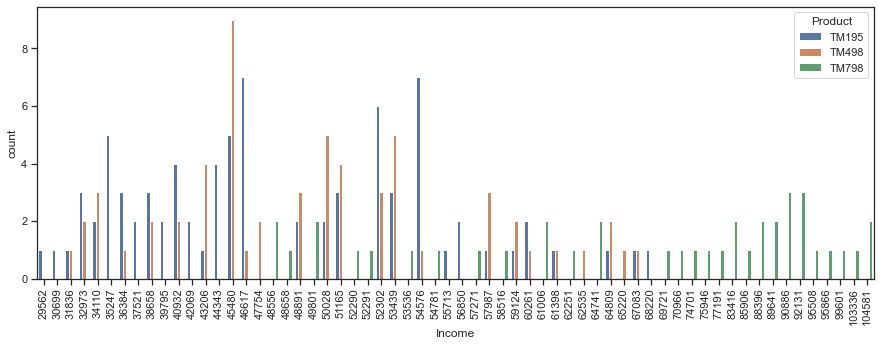

In [147]:
plt.figure(figsize=(15,5)) #Set the Figure Size for below countplot
sns.countplot(data=df, x='Income', hue='Product')
plt.xticks(rotation=90); #Rotate the income values for better seeing

* Product type TM798 is used more amongst user who make more than 61K annualy

##### **How does Income affect product selection and usage?**

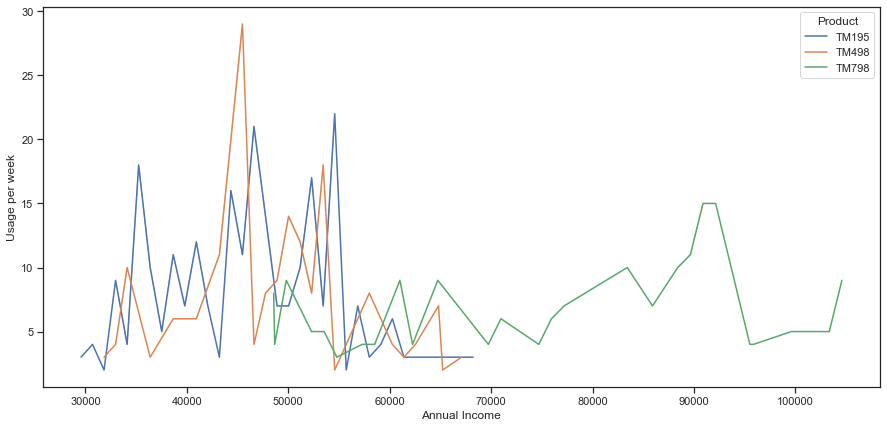

In [94]:
plt.figure(figsize=(15,7)) #Set the Figure Size for below lineplot
sns.lineplot(data=df, x="Income", y="Usage", hue="Product", estimator="sum", ci=False)
plt.ylabel("Usage per week")
plt.xlabel("Annual Income")
plt.show()

* TM498 usage per week is high when income is around 45K
* TM798 usage peek leans lower towards income over 60K
* TM195 is mostly preferred by all income groups below 70K

##### **What more can we see in terms of how age affects usage in relation to product choice?**

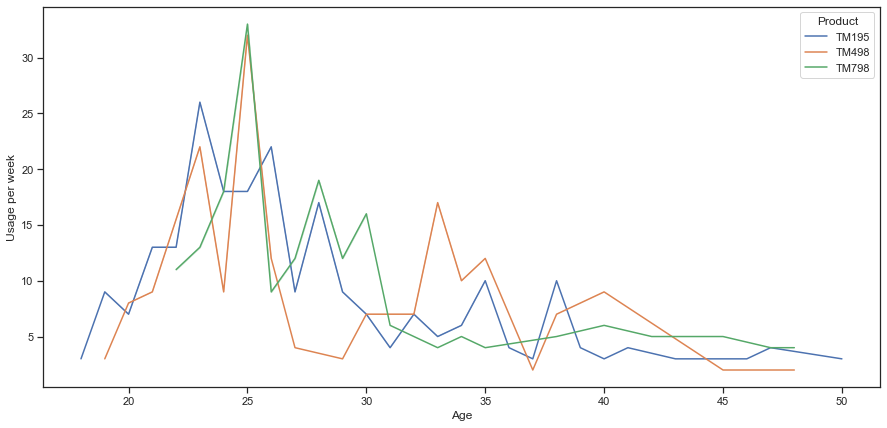

In [95]:
plt.figure(figsize=(15,7)) #Set the Figure Size for below lineplot
sns.lineplot(data=df, x="Age", y="Usage", hue="Product", estimator="sum", ci=False)
plt.ylabel("Usage per week")
plt.xlabel("Age")
plt.show()

* There're some 25 Years old that are also using TM798 which is usually used by folks making more than 60k. 

##### **Are there any 25 Years olds that are making more than 60k per annum in order to be able to afford TM798 treadmill?**

In [96]:
# Get the count of 25 Years olds that are making more than 60K
incOver60K_forBelow25=(df['Age'] == 25).where(df['Income'] > 60000).sum() #, df['Product'] * 2
incOver60K_forBelow25

6

In [97]:
# Get Age Column cells for 25 Years olds and sort it with Income
df.loc[df['Age'] == 25].sort_values('Income', ascending=False).head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
155,TM798,25,Male,18,Partnered,6,5,75946,240
156,TM798,25,Male,20,Partnered,4,5,74701,170
154,TM798,25,Male,18,Partnered,6,4,70966,180
153,TM798,25,Male,18,Partnered,4,3,64741,100
151,TM798,25,Male,16,Partnered,4,4,62251,160
152,TM798,25,Female,18,Partnered,5,5,61006,200
29,TM195,25,Female,14,Partnered,2,2,53439,47
99,TM498,25,Male,16,Partnered,2,2,52302,42
105,TM498,25,Male,16,Partnered,2,3,50028,53
150,TM798,25,Male,16,Partnered,4,5,49801,120


* There're 5 male and 1 female individuals at 25 Years old who are making more than 60K  located in rows between 151-155
   - Which is more than the median for 25Yrs old (45480.00k) who's choice is TM498
* All 6 have education more than the average 15 years
* This analysis proved that TM798 is precier than TM498 which is more popular amongst the 25 Years olds. 

##### **Which product is more popular?**

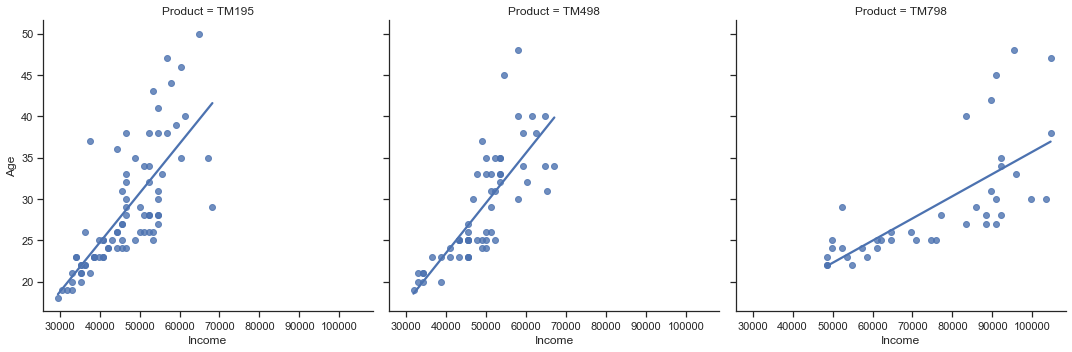

In [98]:
sns.lmplot(data = df, x = 'Income', y = 'Age', col = 'Product', ci=False);

* Product of Choice for all income groups below 70K is clearly TM195 
* Followed by TM498 which is also more targeted around 25yrs olds
* TM798 is least chosen product due to price, since higher income individuals seems to choose TM798

##### **What is the income to Usage ratio between Single and Partnered Users?**

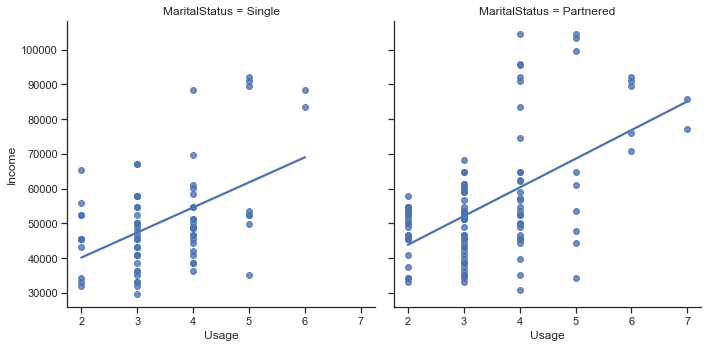

In [124]:
# Side By side scatter plot with line through
sns.lmplot(data = df, x = 'Usage', y = 'Income', col = 'MaritalStatus', ci=False);

* Partnered Couples seems to have more income and more usage per week

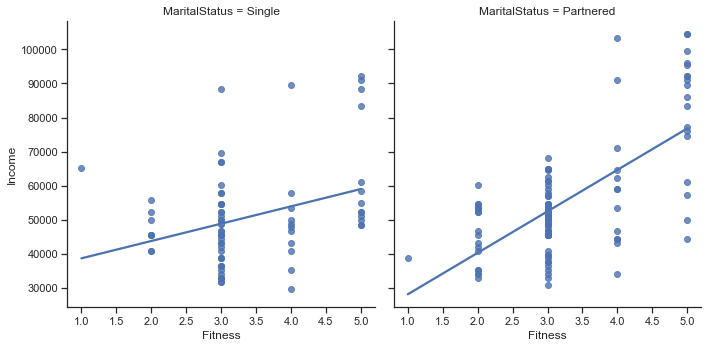

In [128]:
# Side By side scatter plot with line through to measure Fitness levels compared to Income:MaritalStatus
sns.lmplot(data = df, x = 'Fitness', y = 'Income', col = 'MaritalStatus', ci=False);

* Fitness level is also high for Partenered couples makes more than 55K, who also tends to use the treadmill more frequently per week

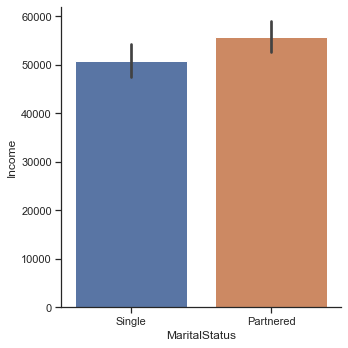

In [126]:
# Cat plot to understand the mean income levels between Single and Partnered individuals 
sns.catplot(x='MaritalStatus', y='Income', data=df, kind="bar");

* Mean Income for Partenered Customer is almost 5k higher than Single users

##### **What is the Average age of users per product amongst the Single and Partered Users?**

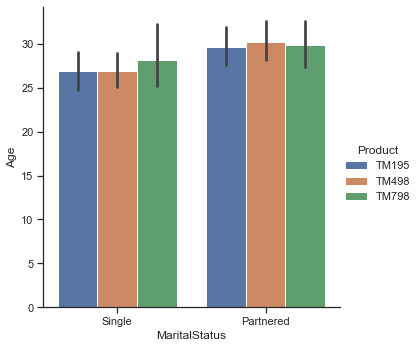

In [134]:
sns.catplot(x='MaritalStatus', y='Age', data=df,hue='Product', kind="bar");

* Mean age for Partnered individuals is higher than the mean age for Single users

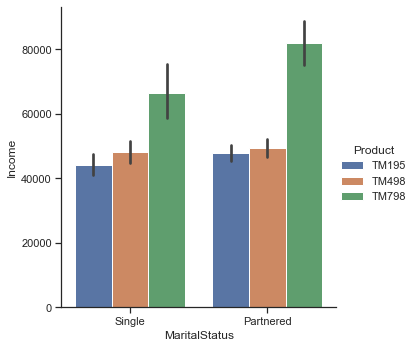

In [133]:
sns.catplot(x='MaritalStatus', y='Income', data=df,hue='Product', kind="bar");

* Average Income levels for Partnered individuals who uses TM498&TM195 are around the same
* While average income increases for TM798 product owners for both Single and Partenered.
* Partnered individuals who are using TM798 makes almost 10k more than Single Users of the same product

##### **Does TM798 has more quality overall & what is the overall picture till now?**

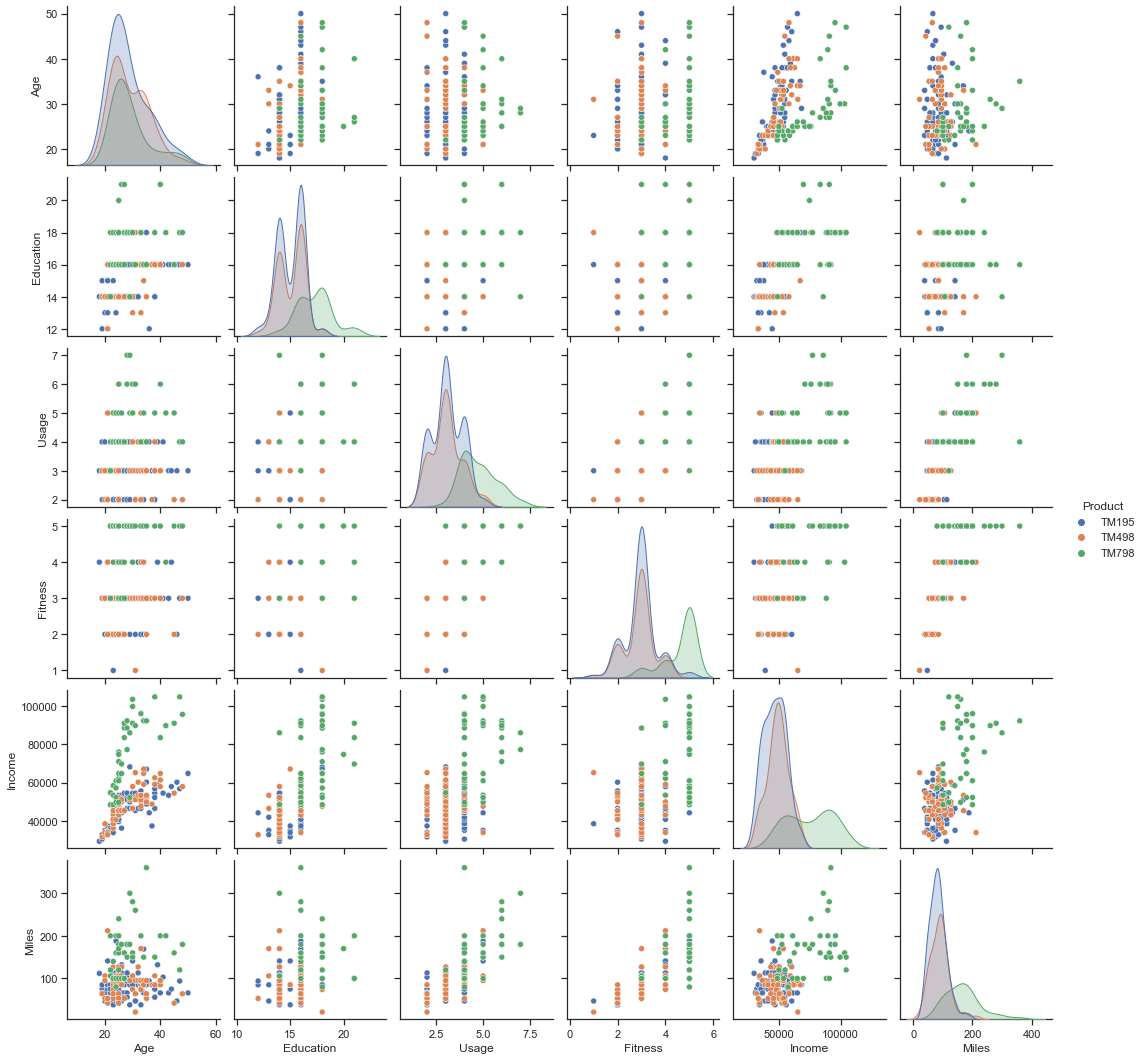

In [99]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="Product")
plt.show()

* TM798-Green: Shows that Higher the Education, higher the Income which also means that user is able to spend more on high end product
* TM498 is more popular amongst the ages under 35yrs olds
* TM798 has the highest expected Miles in comparison to TM195 and TM498

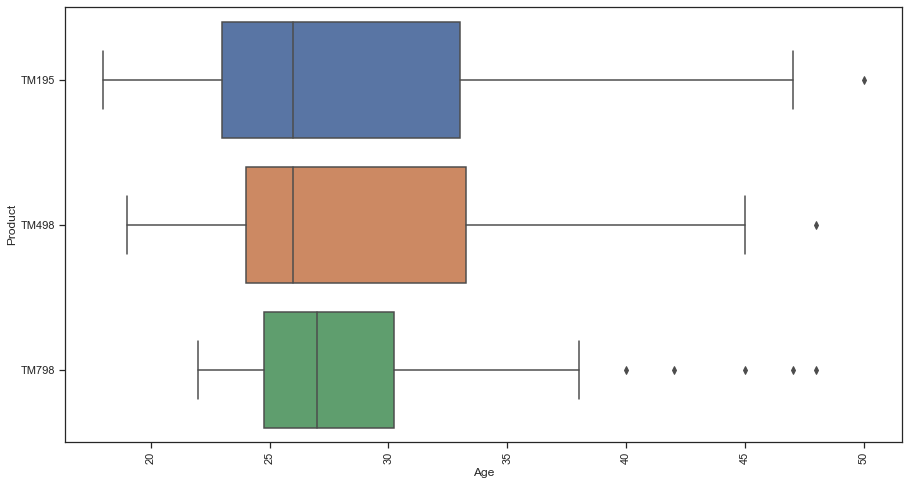

In [105]:
plt.figure(figsize=(15,8)) 
sns.boxplot(data=df, x='Age', y='Product')
plt.xticks(rotation=90);

# TO DO Which product is more popular amongst the Single and Partnered Users?

### **Income by Gender**

#### **Insights**
We have been able to conclude that -  
### Step #1: Age, Income and Product Relationship?


- Users with median income of 43206.00k per annum chooses TM195 which also more popular amongst all income levels upto 70k per annum. 
- Users who are making median income of 45480.00k per annum chooses TM498 which is specially more popular amongst 25yrs old customers. 
   - Median fitness level for are the same for both TM195&TM498 yet miles expected to run is higher for TM498 than TM195. 
- Users who are making 64741.00k or more chooses TM798 
   - TM798 is also used by very small number of 25yrs olds
- TM195 and TM498 has the same fitness level even though miles expected to run is more for TM498 where as TM195 is the most popular. 
   - This means that TM498 has better quality 
   - TM798 on the other hand has 170 miles expected to run, which makes it the pricier but the best quality product 
- Partnered individuals who are using TM798 makes almost 10k more than Single Users of the same product   
- 54% of Users have self Rated fitness Level  of 3 
   - More than half of our users are using the App to rate their Fitness Level
- What is the percentage and count of Males vs Female users?   
-  What is the percentage&count of Single vs Partnered users in the data?
 `59%` of users are Partnered where as `41%` are Single. 
   
- Median age for TM798 product is higher than TM498 and TM195
- TM195 is the Most popular product for most ages and income groups
- M798 is more expensive than TM195&TM498 therefore it is used much m ore by the users who makes more than 60K
- TM498 is more popular amongst 25 Year olds who makes 45,5K annually
Income by Gender?
### Step #2: Who is each product for by Gender?
1. Usage by Gender?
2. Fitness by Gender?

### Additonal Info to make sense of?
75% of Users are education is between 14&16, whereas 67% of Usage rate is between 3&4
What is the usage rate of the people who are educated between 14&16 yrs?

#### **Recommendations to business**



####  **Further Analysis that can be done**

1. Analyze the Price Point per each product in order to understand what makes TM195 most preferred amongst all incomes level whilst TM498 is more preferred by 25Years old users.